<a href="https://colab.research.google.com/github/KISHANJB/Sign-Language-Recognition/blob/main/Introduction_to_tokenization_in_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NLP: Tokenization:
Tokenization is simply a method of splitting input textual data into individual separate meaningful tokens that can be further understood and processed by machines.
Tokens can be words, characters, or even sub-words or sentences depending on what splitting algorithm is being employed.
Byte-Pair Encoding (BPE), Word Piece, Unigram, and Sentence Piece algorithms are used to tokenize the documents.

Word Based Tokenization:
entire words separated by either punctuation, whitespaces, delimiters, etc. are considered as tokens.
Separation boundary can be task-specific and could sometimes depend on the nature of data you’re working on.
A word-based tokenizer for tokenizing Twitter tweets would slightly deviate from the one used for tokenizing news articles
Eg. Can't wait to start learning tokenization!
space tokeniziation: Can't  wait  to  start  learning  tokenization!
space and punctuation tokeniziation:Can ' t  wait  to  start  learning  tokenization !
Note: in the English language, not all punctuations can be treated as token boundaries without understanding the context in which they reside.
 Rule-based words tokenizers:
  SpaCy offers a great rule-based tokenizer which applies rules specific to a language for generating semantically rich tokens.
  Ca n't  wait  to  start  learning  tokenization !


Character Based Tokenization:
Character based tokenization, as you can imagine, considers all base characters as tokens. They could be either UNICODE, ASCII, etc. as per your requirement.
 C a n ' t w a i t  t o s t a r t l e a r n i n g t o k e n i z a t i o n !

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
about_text = ("Gus Proto is a Python developer currently" " working for a London-based Fintech"   " company. He is interested in learning"  " Natural Language Processing.")
about_doc = nlp(about_text)
for token in about_doc:
     print (token, token.idx)

Gus 0
Proto 4
is 10
a 13
Python 15
developer 22
currently 32
working 42
for 50
a 54
London 56
- 62
based 63
Fintech 69
company 77
. 84
He 86
is 89
interested 92
in 103
learning 106
Natural 115
Language 123
Processing 132
. 142


1.   you iterate over Doc, printing both Token and the .idx
attribute, which represents the starting position of the tokenin the original text.
2.   spaCy provides various other attributes for the Token class:




In [ ]:
for token in about_doc:
 print(token.text)

Gus
Proto
is
a
Python
developer
currently
working
for
a
London
-
based
Fintech
company
.
He
is
interested
in
learning
Natural
Language
Processing
.


spaCy start spliting first based on the white space available in the raw text.
Then it processes the text from left to right and on each item (splittted based on white space) it performs the following two checks:

*   Exception Rule Check: Punctuation available in “U.S.” should not be treated as further tokens. It should remain one. However we’re should be splitted into “we” and ” ‘re “.
*   Prefix, Suffix and Infix check: Punctuation like commas, periods, hyphens or quotes to be treated as tokens and separated out.
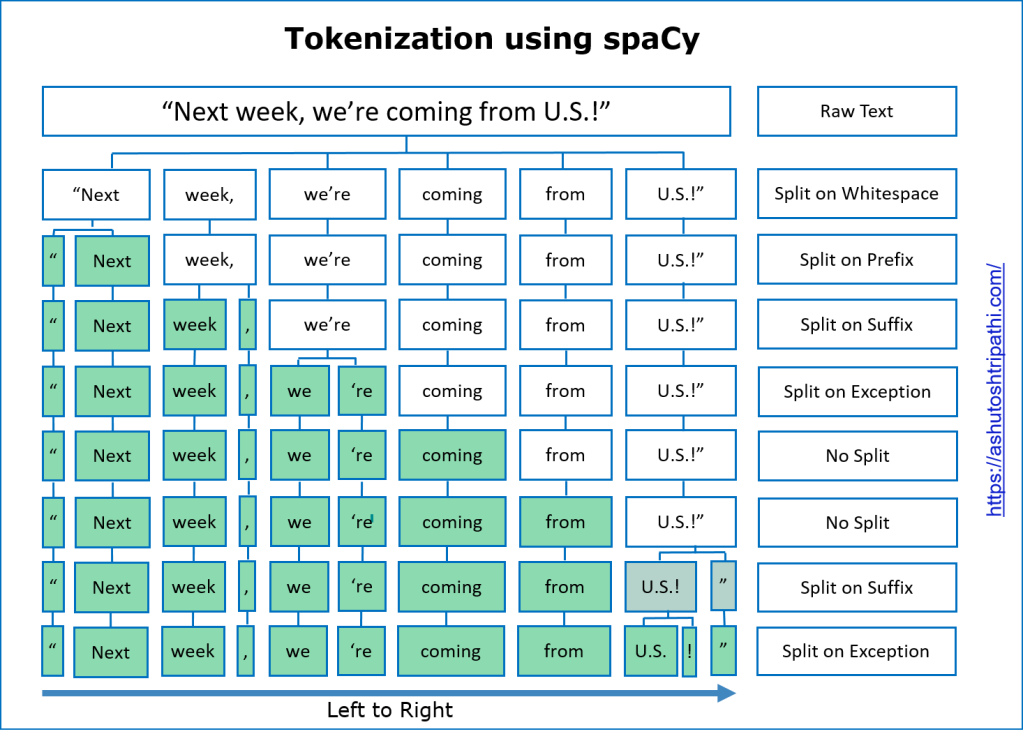





In [ ]:
doc2 = nlp(u"We're here to guide you! Send your query, email contact@enetwork.ai or visit us at http://www.enetwork.ai!")
for t in doc2:
    print(t)

We
're
here
to
guide
you
!
Send
your
query
,
email
contact@enetwork.ai
or
visit
us
at
http://www.enetwork.ai
!




*   Note that the exclamation points, comma are assigned their own tokens. However point, colon present in email address and website URL are not isolated. Hence both the email address and website are preserved.




In [ ]:
doc3 = nlp(u'A 40km U.S. cab ride costs $100.60')
for t in doc3:
    print(t)

A
40
km
U.S.
cab
ride
costs
$
100.60




*   Here the distance unit and dollar sign are assigned their own tokens, however the dollar amount is preserved, point in amount is not isolated.
*   Exceptions in Token generation
Punctuation that exists as part of a known abbreviation will be kept as part of the token.
*   Here the abbreviations for “Saint” and “United States” are both preserved. Mean point next to St. is not separated as token. Same in U.S.






In [ ]:
doc4 = nlp(u"Let's visit the St. Louis in the U.S. next year.")
for t in doc4:
    print(t)

Let
's
visit
the
St.
Louis
in
the
U.S.
next
year
.


**Counting Tokens:**
Using len() function, you can count the number of tokens in a document.

In [ ]:
print(len(doc4))
print(len(doc3))
print(len(doc2))
len(doc3)


12
9
19


9

**Counting Vocab Entries:**
Vocab objects contain a full library of items! hence vocabe length are same in each document and it depends on the used vocaub corpus.

In [ ]:
print(len(doc4.vocab))
print(len(doc3.vocab))
print(len(doc2.vocab))
len(doc3.vocab)

808
808
808


808

**Indexing and Slicing in Token:**
*   Doc objects can be thought of as lists of token objects.
*   As such, individual tokens can be retrieved by index position.

*  spans of tokens can be retrieved through slicing:






In [ ]:
doc4 = nlp(u"Let's visit the St. Louis in the U.S. next year.")
print(doc4[0])
print(doc4[2])
print(doc4[2:5])
print(doc4[-3])
print(doc4[-3:])
print(doc4[-5:])

Let
visit
visit the St.
next
next year.
the U.S. next year.


**Note:** Assignment of token is not allowed

In [ ]:
doc4 = nlp(u"Let's visit the St. Louis in the U.S. next year.")
doc4[0]

Let

In [ ]:
doc4[3]

the

In [ ]:
doc4[0] = doc4[3] // object does not support item assignment

TypeError: ignored

**Lemmatization:**

*   In contrast to stemming, Lemmatization looks beyond word reduction, and considers a language’s full vocabulary to apply a morphological analysis to words.
*   The lemma of ‘was’ is ‘be’, lemma of “rats” is “rat” and the lemma of ‘mice’ is ‘mouse’. Further, the lemma of ‘meeting’ might be ‘meet’ or ‘meeting’ depending on its use in a sentence.

*    Lemmatization looks at surrounding text to determine a given word’s part of speech. It does not categorize phrases.


*   **Note:** spaCy do not have stemming. Due to the reason that Lemmatization is seen as more informative than stemming.
*   List item




In [ ]:
doc1 = nlp(u"I am a runner running in a race because I love to run since I ran today")
for token in doc1:
    print(token.text, '\t', token.pos_, '\t', token.lemma, '\t', token.lemma_)

I 	 PRON 	 4690420944186131903 	 I
am 	 AUX 	 10382539506755952630 	 be
a 	 DET 	 11901859001352538922 	 a
runner 	 NOUN 	 12640964157389618806 	 runner
running 	 VERB 	 12767647472892411841 	 run
in 	 ADP 	 3002984154512732771 	 in
a 	 DET 	 11901859001352538922 	 a
race 	 NOUN 	 8048469955494714898 	 race
because 	 SCONJ 	 16950148841647037698 	 because
I 	 PRON 	 4690420944186131903 	 I
love 	 VERB 	 3702023516439754181 	 love
to 	 PART 	 3791531372978436496 	 to
run 	 VERB 	 12767647472892411841 	 run
since 	 SCONJ 	 10066841407251338481 	 since
I 	 PRON 	 4690420944186131903 	 I
ran 	 VERB 	 12767647472892411841 	 run
today 	 NOUN 	 11042482332948150395 	 today


**Creating a Function to find and print Lemma in more structured way.**

In [ ]:
def find_lemmas(text):
    for token in text:
        print(f'{token.text:{12}} {token.pos_:{10}} {token.lemma:<{22}}{token.lemma_}')

In [ ]:
doc5 = nlp(u"I saw eighteen mice today!")
find_lemmas(doc5)

I            PRON       4690420944186131903   I
saw          VERB       11925638236994514241  see
eighteen     NUM        9609336664675087640   eighteen
mice         NOUN       1384165645700560590   mouse
today        NOUN       11042482332948150395  today
!            PUNCT      17494803046312582752  !


In [ ]:
doc6 = nlp(u"I am meeting him tomorrow at the meeting.")
find_lemmas(doc6)

I            PRON       4690420944186131903   I
am           AUX        10382539506755952630  be
meeting      VERB       6880656908171229526   meet
him          PRON       1655312771067108281   he
tomorrow     NOUN       3573583789758258062   tomorrow
at           ADP        11667289587015813222  at
the          DET        7425985699627899538   the
meeting      NOUN       14798207169164081740  meeting
.            PUNCT      12646065887601541794  .




*   Here the lemma of meeting is determined by its Part of Speech tag.


*   for first meeting which is verb it has calculated lemma as meet. and for second meeting which is Noun, and it has calculated lemma as meeting itself.


*   Note that Lemmatization does not reduce words to their most basic synonym – that is, enormous doesn’t become big and automobile doesn’t become car.




In [ ]:
doc7 = nlp(u"That's an enormous automobile")
find_lemmas(doc7)

That         PRON       4380130941430378203   that
's           AUX        10382539506755952630  be
an           DET        15099054000809333061  an
enormous     ADJ        17917224542039855524  enormous
automobile   NOUN       7211811266693931283   automobile


**Stop Words:**

*  Words like “a” and “the” appear so frequently that they don’t require tagging as thoroughly as nouns, verbs and modifiers.
*   We call them stop words, and they can be filtered from the text to be processed.

*   spaCy holds a built-in list of some 305 English stop words.
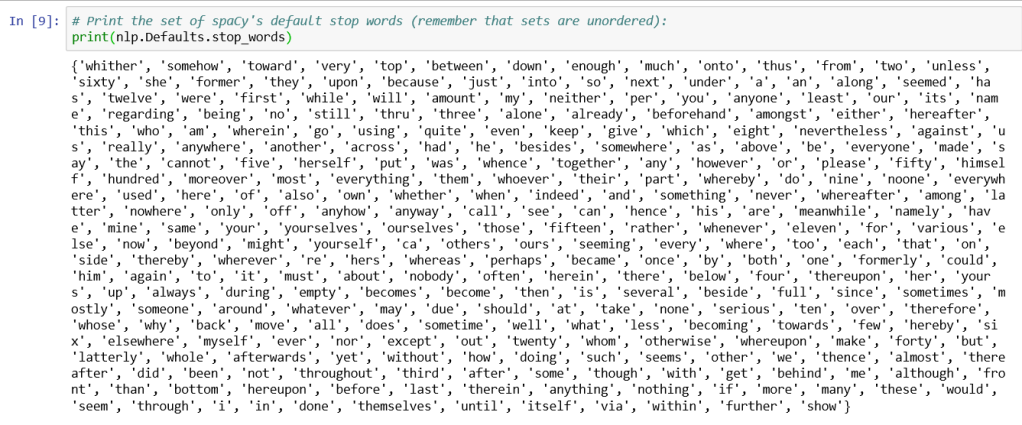





In [ ]:
print(nlp.Defaults.stop_words)
print(len(nlp.Defaults.stop_words))

{'often', '’ve', 'being', 'namely', 'besides', 'itself', 'part', 'no', "'re", 'my', 'when', 'ca', 'was', 'together', 'toward', 'fifty', 'down', 'whenever', 'if', 'therein', 'ever', '’m', 'another', 'you', 'all', 'seemed', 'must', 'but', 'those', 'how', 'hundred', 'this', 'side', "n't", 'not', 'across', 'cannot', 'yet', 'can', 'within', 'via', 'the', 'whence', 'them', 'without', 'he', 'or', 'except', 'upon', 'sometime', 'regarding', 'anywhere', 'about', 'none', 'last', 'somewhere', 'than', 'because', 'someone', 'most', 'beforehand', 'keep', 'some', 'too', 'same', 'whereby', 'call', 'anyhow', 'your', 'everywhere', 'also', 'moreover', 'thereafter', 'of', 'ourselves', 'may', "'s", 'full', 'please', 'although', 'move', 'afterwards', 'thereupon', '’ll', 'hence', 'me', 'on', 'with', 'beyond', 'us', 'behind', 'hereupon', 'nothing', 'per', "'d", 'against', 'onto', "'ll", 'becoming', 'six', 'perhaps', '’d', 'eight', 'whereas', 'anyone', 'who', 'beside', 'various', 'would', 'seeming', 'due', 'oth

**Check whether word is stopword or not and Adding a user defined stop word**
There may be times when you wish to add a stop word to the default set. Perhaps you decide that 'btw' (common shorthand for “by the way”) should be considered a stop word.

In [ ]:
nlp.vocab['Fifteen'].is_stop

True

In [ ]:
nlp.vocab['teen'].is_stop

False

In [ ]:
nlp.vocab['btw'].is_stop

True

In [ ]:
#Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('btw') #alwasy use lowercase while adding the stop words
#Set the stop_word tag on the lexeme
nlp.vocab['btw'].is_stop = True

In [ ]:
nlp.vocab['btw'].is_stop

True

In [ ]:
print(len(nlp.Defaults.stop_words)) # after adding one stop word, stopword length increased by 1

327


**Removing a stop word:**


*   Alternatively, you may decide that 'btw' should not be considered a stop word.
*   List item



In [ ]:
nlp.vocab['without'].is_stop

True

In [ ]:
#Remove the word from the set of stop words
nlp.Defaults.stop_words.remove('btw')
#Remove the stop_word tag from the lexeme
nlp.vocab['btw'].is_stop = False

In [ ]:
nlp.vocab['btw'].is_stop

False

**Machine Learning Techniques for Text Representation in NLP:**


*   Feature Extraction is a general term that is also known as a text representation of text vectorization which is a process of converting text into numbers. we call vectorization because when text is converted in numbers it is in vector form.
*   Why feature extraction needed because machines can only understand numbers and to make machines able to identify language we need to convert it into numeric form.

**Common Words used:**


*   Corpus(C) ~ The total number of combinations of words in the whole dataset is known as Corpus. In simple words concatenating all the text records of the dataset forms a corpus.

*  Vocabulary(V) ~ a total number of distinct words which form your corpus is known as Vocabulary.


*   Document(D) ~ There are multiple records in a dataset so a single record or review is referred to as a document.

*   Word(W) ~ Words that are used in a document are known as Word.

**Approaches are:**


*   Label Encoding


*   One hot Encoding

*   Bag of words
*   N-gram

*   TF-IDF
*   Word Embedding












Label Encoding:

*   In some machine learning activiteis the data set might contain text or categorical values (basically non-numerical values)
*   For example, color feature having values like red, orange, blue, white etc. Meal plan having values like breakfast, lunch, snacks, dinner, tea etc.

*   Few algorithms such as CATBOAST, decision-trees can handle categorical values very well but most of the algorithms expect numerical values to achieve state-of-the-art results.
*   This approach is very simple and it involves converting each value in a column to a number.






In [ ]:
# import required libraries
import pandas as pd
import numpy as np
# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
# converting type of columns to 'category'
bridge_df['Bridge_Types'] = bridge_df['Bridge_Types'].astype('category')
# Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = bridge_df['Bridge_Types'].cat.codes
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


In [ ]:
import numpy as np
import pandas as pd
sentences = ['Author writes on Analytics Vidhya', 'Vidhya reads and writes comment on Analytics Vidhya', 'Vidhya appreciates author']
df = pd.DataFrame({"text":sentences, "output":[1,1,0]})
df.head()

,text,output
0,Author writes on Analytics Vidhya,1
1,Vidhya reads and writes comment on Analytics V...,1
2,Vidhya appreciates author,0


One hot Encoding:

*   All the words are the part of vocabulary database and put vocabulary text in colum of matrix.
*   Put words of your actual sentence or documents in rows of matrix.

*   It is primitive way of representing text into vector and easy to implment.
*   its flaws are

*    sparsity
*   Consume too much memory and computer resources

*   Out of Vocabulary problem
*   size of vector is not fixed and most of the  machine learning algorithm works on fixed size vector.
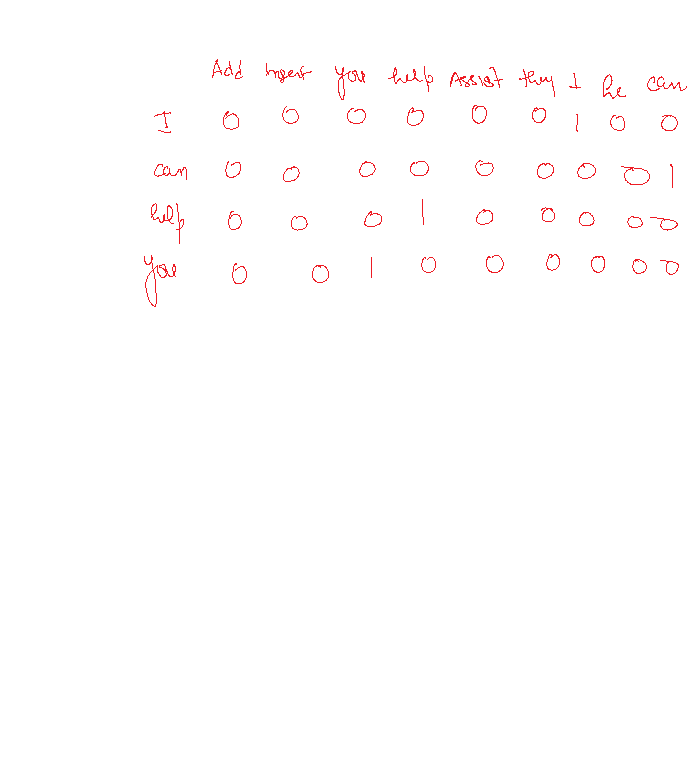








In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = ['can', 'i', 'help', 'you', 'i', 'am', 'very', 'glad', 'to', 'meet', 'you']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['can' 'i' 'help' 'you' 'i' 'am' 'very' 'glad' 'to' 'meet' 'you']
[1 4 3 8 4 0 7 2 6 5 8]
[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]
['can']


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Word Embedding: Word2Vec model


*   enables similar words to have similar dimensions and, consequently, helps bring context.
*   Word embeddings eventually help in establishing the association of a word with another similar meaning word through the created vectors.

*   Two different model architectures that can be used by Word2Vec to create the word embeddings are the Continuous Bag of Words (CBOW) model & the Skip-Gram model.
*   The CBOW architecture comprises a deep learning classification model in which we take in context words as input, X, and try to predict our target word, Y.

*   For example, if we consider the sentence – “Word2Vec has a deep learning model working in the backend.”,there can be pairs of context words and target (center) words. If we consider a context window size of 2, we will have pairs like ([deep, model], learning), ([model, in], working), ([a, learning), deep) etc.
*   List item

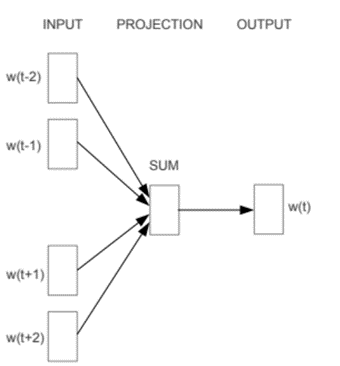
Fig: Structure of training word using word2vec

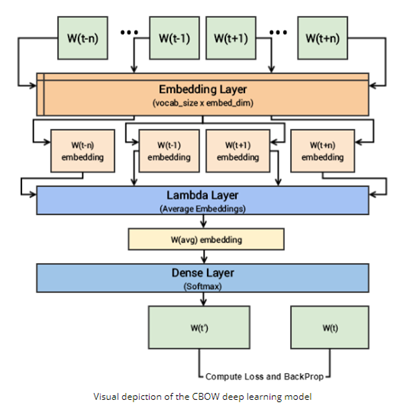

Fig: CBOW Deep learning model[Source: https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-cbow.html]

The following steps describe how the model works:

The context words are first passed as an input to an embedding layer (initialized with some random weights) as shown in the Figure below.

The word embeddings are then passed to a lambda layer where we average out the word embeddings.

We then pass these embeddings to a dense SoftMax layer that predicts our target word. We match this with our target word and compute the loss and then we perform backpropagation with each epoch to update the embedding layer in the process.

Skip-gram model:
given a target (centre) word, the context words are predicted.

considering the same sentence – “Word2Vec has a deep learning model working in the backend.” and a context window size of 2, given the centre word ‘learning’, the model tries to predict [‘deep’, ’model’] and so on.
The following steps describe how the model works:


Both the target and context word pairs are passed to individual embedding layers from which we get dense word embeddings for each of these two words.

We then use a ‘merge layer’ to compute the dot product of these two embeddings and get the dot product value.
This dot product value is then sent to a dense sigmoid layer that outputs either 0 or 1.

The output is compared with the actual label and the loss is computed followed by backpropagation with each epoch to update the embedding layer in the process.
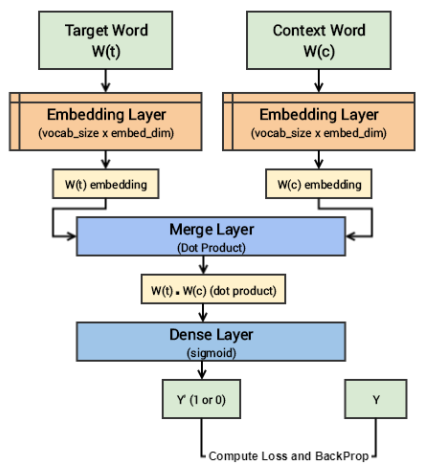
Source: https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-skip-gram.html

References:


1.  https://ashutoshtripathi.com/2020/04/06/guide-to-tokenization-lemmatization-stop-words-and-phrase-matching-using-spacy/
2.   https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd


